# **Obstacle Detection**

In [1]:
# Download YOLOv7 code
#!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
from pathlib import Path

import torch

from models.yolo import Model
from utils.general import check_requirements, set_logging
from utils.google_utils import attempt_download
from utils.torch_utils import select_device

dependencies = ['torch', 'yaml']
#check_requirements(Path("C:/Users/Manya Gaur/Capstone/yolov7/requirements.txt").parent / 'requirements.txt', exclude=('pycocotools', 'thop'))
#set_logging()

def custom(path_or_model='path/to/model.pt', autoshape=True):
    """custom mode

    Arguments (3 options):
        path_or_model (str): 'path/to/model.pt'
        path_or_model (dict): torch.load('path/to/model.pt')
        path_or_model (nn.Module): torch.load('path/to/model.pt')['model']

    Returns:
        pytorch model
    """
    model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(path_or_model, str) else path_or_model  # load checkpoint
    if isinstance(model, dict):
        model = model['ema' if model.get('ema') else 'model']  # load model

    hub_model = Model(model.yaml).to(next(model.parameters()).device)  # create
    hub_model.load_state_dict(model.float().state_dict())  # load state_dict
    hub_model.names = model.names  # class names
    if autoshape:
        hub_model = hub_model.autoshape()  # for file/URI/PIL/cv2/np inputs and NMS
    device = select_device('0' if torch.cuda.is_available() else 'cpu')  # default to GPU if available
    return hub_model.to(device)

model = custom(path_or_model='C:/Users/Manya Gaur/Downloads/best (6).pt')  # custom example
# model = create(name='yolov7', pretrained=True, channels=3, classes=80, autoshape=True)  # pretrained example

# Verify inference
import numpy as np
from PIL import Image

#imgs = [np.zeros((640, 480, 3))]

results = model("C:/Users/Manya Gaur/Downloads/10000001.jpg")  # batched inference
#results.print()
#results.save()
df_prediction = results.pandas().xyxy
df_prediction



C:\Users\Manya Gaur\Capstone\yolov7
Adding autoShape... 


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[         xmin        ymin        xmax        ymax  confidence  class  \
 0  207.978760    0.000000  325.863281  561.023499    0.623623      0   
 1  170.533508  212.913116  213.373383  606.781494    0.574400     16   
 2  421.222565  362.889862  433.202362  437.535492    0.522803     16   
 3  392.443268  353.616943  404.814117  409.893311    0.473337      0   
 4   51.100334  352.258484  179.451599  425.976257    0.461133      9   
 5   49.933968  396.294373  218.303406  534.368835    0.460423     10   
 6  336.492767  460.276520  480.000000  590.579956    0.452268      3   
 7  469.969299  364.142456  479.108154  386.962402    0.365732      6   
 8   52.795425  349.369873  180.477371  430.388489    0.283276     10   
 9  313.549713  286.066315  342.480194  395.178680    0.273312      0   
 
         name  
 0       tree  
 1       pole  
 2       pole  
 3       tree  
 4      truck  
 5        car  
 6  crosswalk  
 7     person  
 8        car  
 9       tree  ]

10


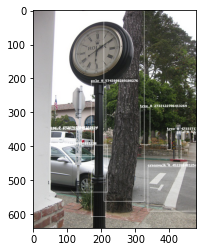

In [2]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import tkinter
%matplotlib inline

def plot_bounding_box(image, annotation_list):
    #annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)
    print(len(annotation_list))
    for i in range(len(annotation_list)):
        x0 = annotation_list.loc[i,"xmin"]
        y0 = annotation_list.loc[i,"ymin"]
        x1 = annotation_list.loc[i,"xmax"]
        y1 = annotation_list.loc[i,"ymax"]
        conf = annotation_list.loc[i,"confidence"]
        cls_no = annotation_list.loc[i,"class"]
        obj_cls = annotation_list.loc[i,"name"]
        
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), obj_cls+" "+str(conf))
    
    plt.imshow(np.array(image))
    plt.show()
    


#Get the corresponding image file
image_file = "C:/Users/Manya Gaur/Downloads/10000001.jpg"
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, df_prediction[0])

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading

In [4]:
# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', 
    tooltip='Description',
    icon='square' 
)


# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        #frame = cv2.flip(frame, 1) # if your camera reverses your image
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = model(rgb)
        df_prediction = results.pandas().xyxy
        print(df_prediction)
        _, frame = cv2.imencode('.jpeg', frame)
        #results = model(frame)
        #df_prediction = results.pandas().xyxy
        #df_prediction
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

            
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  227.802765  72.618668  640.000000  473.554626    0.505004      6  person
1    0.000000   0.000000  279.988892  480.000000    0.380915      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin       xmax        ymax  confidence  class    name
0    3.718018   0.000000  328.41745  480.000000    0.633277      6  person
1  220.387497  51.557999  640.00000  475.955383    0.480567      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  306.256104  480.000000    0.595826      6  person
1  221.118927  62.253922  639.066772  476.290771    0.559573      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  189.356567  479.528687    0.653247      6  person
1   38.989502   0.000000  623.615662  480.000000    0.550810      6  person
2  283.405518  79.621887  640.000000  473.352173    0.498176      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.105484  135.321289  471.808472    0.767202      6  person
1  219.075668  55.647034  640.000000  475.493530    0.549866      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  285.380859  79.233307  640.000000  471.856354    0.643710      6  person
1    0.000000   0.333344  142.576538  479.504852    0.603919      6  person
2    0.000000   0.000000  135.806778  477.561096    0.404143     17     dog]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   3.289810  119.814857  473.855042    0.742964      6  person
1  224.004913  59.593719  640.000000  475.253815    0.603783      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   6.399063  121.268692  470.470825    0.614920      6  person
1  283.918091  80.330414  640.000000  473.122345    0.540993      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.645443   3.597427   96.131195  469.488892    0.645197      6  person
1  281.339844  79.981674  640.000000  471.291260    0.590230      6  person
2    6.142822   0.000000  640.000000  480.000000    0.317781      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.576244   5.830215  100.668777  468.914795    0.756552      6  person
1  280.401123  82.821579  640.000000  471.274536    0.621062      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin       ymin        xmax        ymax  confidence  class    name
0    0.00000   4.628052  122.071968  471.577332    0.659712      6  person
1  230.82933  70.117386  640.000000  474.107239    0.525295      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   4.439224  131.458893  477.607117    0.788725      6  person
1  277.379333  78.804504  640.000000  471.918396    0.542656      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.509819   0.747635  139.693817  477.925232    0.816043      6  person
1  283.283264  78.854324  640.000000  470.912048    0.695289      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   5.262619  155.837433  480.000000    0.797488      6  person
1  278.869141  76.833420  640.000000  471.358032    0.596870      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.774078  166.095947  480.000000    0.758196      6  person
1  282.055725  77.503418  640.000000  471.689148    0.713727      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax       ymax  confidence  class    name
0  285.219971  79.629776  640.000000  472.78186    0.612899      6  person
1    0.197792   0.000000  203.980133  480.00000    0.609865      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  233.972595  480.000000    0.748836      6  person
1  232.463913  72.025482  640.000000  474.826752    0.547566      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin       xmax        ymax  confidence  class    name
0    0.101639   0.000000  240.54512  480.000000    0.596821      6  person
1  224.126328  69.392853  640.00000  471.976471    0.472205      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  18.273071   0.0  640.000000  480.0    0.485929      6  person
1   0.000000   0.0  242.471222  480.0    0.409549      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin        ymin        xmax        ymax  confidence  class    name
0   12.825073    0.000000  640.000000  474.646454    0.392634      6  person
1    1.426300    0.000000  264.843903  480.000000    0.285387      6  person
2  295.259155  105.515152  639.285400  474.573364    0.256280      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  19.253448   0.0  639.882446  480.0    0.600363      6  person
1   0.000000   0.0  247.627563  480.0    0.418113      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin        ymin        xmax        ymax  confidence  class    name
0   19.885925    4.307587  635.007202  472.049133    0.509399      6  person
1  294.716248  100.083511  639.968201  474.866699    0.307885      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  16.120453   0.0  638.197632  480.0    0.643231      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  14.448303   0.0  640.000000  480.0    0.599589      6  person
1   0.000000   0.0  303.264435  480.0    0.272852      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  18.769562   0.0  638.817017  480.0    0.628183      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  21.292511   0.0  636.510254  480.0    0.639445      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  21.959747   0.0  638.937500  480.0    0.595402      6  person
1   0.000000   0.0  288.141571  480.0    0.315365      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin      ymin        xmax   ymax  confidence  class    name
0  21.568726  0.133881  639.575867  480.0    0.683322      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax        ymax  confidence  class    name
0  18.751923   0.0  635.822266  478.119507    0.626982      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax        ymax  confidence  class    name
0  24.093414   0.0  637.161499  476.235046    0.593495      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin   xmax   ymax  confidence  class    name
0  18.896637   0.0  640.0  480.0    0.683936      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin      ymin        xmax   ymax  confidence  class    name
0  20.541748  0.077866  636.615845  480.0    0.650323      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax        ymax  confidence  class    name
0  22.026093   0.0  635.417969  479.506592    0.685074      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  17.044373   0.0  639.654968  480.0    0.657036      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  19.696503   0.0  639.960083  480.0    0.661559      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax   ymax  confidence  class    name
0  19.486572   0.0  639.558472  480.0    0.690925      6  person
1   0.000000   0.0  282.852844  480.0    0.377642      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin   xmax   ymax  confidence  class    name
0  24.188599   0.0  640.0  480.0    0.749801      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin   xmax   ymax  confidence  class    name
0  27.840485   0.0  640.0  480.0    0.693425      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin        xmax       ymax  confidence  class    name
0  23.639252   0.0  639.234375  477.07547    0.509040      6  person
1   0.000000   0.0  281.856384  480.00000    0.375699      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin   xmax   ymax  confidence  class    name
0  14.473877   0.0  640.0  480.0    0.526051      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin      ymin        xmax   ymax  confidence  class    name
0  18.677216  1.416077  638.361572  480.0    0.664292      6  person
1   0.000000  0.000000  284.800140  480.0    0.268929      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin      ymin        xmax   ymax  confidence  class    name
0  24.482666  1.702789  640.000000  480.0    0.639766      6  person
1   0.000000  0.000000  294.517242  480.0    0.480530      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin   xmax   ymax  confidence  class    name
0  14.857239   0.0  640.0  480.0    0.668106      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin   xmax   ymax  confidence  class    name
0  14.710327   0.0  640.0  480.0    0.487507      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin   xmax        ymax  confidence  class    name
0   12.230164   0.000000  640.0  480.000000    0.484347      6  person
1  287.327881  78.297058  640.0  472.592346    0.320606      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin        ymin   xmax        ymax  confidence  class    name
0   19.805084    0.000000  640.0  480.000000    0.654521      6  person
1  299.078156  112.713333  640.0  476.256104    0.267881      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin   xmax   ymax  confidence  class    name
0  21.106354   0.0  640.0  480.0    0.627855      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  314.800079  480.000000    0.713844      6  person
1  287.374939  65.509125  640.000000  473.057281    0.323830      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin  ymin   xmax   ymax  confidence  class    name
0  12.379395   0.0  640.0  480.0    0.601725      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin        ymin        xmax        ymax  confidence  class  \
0    4.321075    0.000000  325.401764  480.000000    0.524157      6   
1  300.510559   65.671494  640.000000  475.365051    0.457454      6   
2    0.149267  368.561035   42.197136  480.000000    0.286992     12   

              name  
0           person  
1           person  
2  reflective_cone  ]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  305.680786  480.000000    0.574708      6  person
1  331.036346  72.030258  640.000000  474.411011    0.518073      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  345.151733  66.384995  640.000000  479.238831     0.73658      6  person
1    0.000000   0.000000  305.718903  480.000000     0.63935      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  336.913330  64.364258  640.000000  477.802612    0.580423      6  person
1   14.777069   0.000000  639.311646  480.000000    0.410729      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  336.891235  59.557831  640.000000  476.916351    0.574644      6  person
1   16.262115   0.000000  639.696045  480.000000    0.480733      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin   xmax        ymax  confidence  class    name
0   11.433075   0.000000  640.0  480.000000    0.541019      6  person
1  330.660095  56.879944  640.0  476.760864    0.424437      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin   xmax        ymax  confidence  class    name
0  328.250702  55.643509  640.0  478.557068    0.435363      6  person
1   17.314636   0.000000  640.0  480.000000    0.433155      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  304.330627  480.000000    0.524508      6  person
1  331.003906  53.718094  640.000000  476.131836    0.479146      6  person
2   21.103577   0.000000  634.316956  480.000000    0.288174      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  329.330719  58.699066  640.000000  479.868195    0.570455      6  person
1    0.000000   0.000000  640.000000  479.999390    0.393102      6  person
2    0.000000   0.000000  288.082947  480.000000    0.261083      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  328.043091  56.959229  640.000000  478.205505    0.514575      6  person
1    0.000000   0.000000  238.098892  480.000000    0.369115      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax      ymax  confidence  class    name
0    0.000000   0.000000  215.929092  480.0000    0.784174      6  person
1  298.451538  45.462143  640.000000  475.9646    0.390254      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin       xmax        ymax  confidence  class    name
0    0.000000   0.000000  212.27182  480.000000    0.813355      6  person
1  302.749725  51.608353  640.00000  474.696289    0.560031      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  224.093414  480.000000    0.667496      6  person
1  296.769958  53.420288  640.000000  474.435913    0.460912      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  226.371094  480.000000    0.749240      6  person
1  303.104126  52.242142  640.000000  476.075439    0.465934      6  person
2   10.395996   0.000000  603.034363  480.000000    0.270224      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin       ymin       xmax        ymax  confidence  class    name
0    0.00000   0.000000  225.65593  480.000000    0.834219      6  person
1  296.60083  58.485703  640.00000  474.731445    0.389303      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  232.110153  480.000000    0.634129      6  person
1  294.192047  61.191971  640.000000  476.604248    0.380908      6  person
2    0.000000   0.000000  615.982788  476.877533    0.320381      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin    ymin        xmax        ymax  confidence  class    name
0    0.297333   0.000  228.089676  480.000000    0.672394      6  person
1  328.469513  66.625  640.000000  476.199463    0.410994      6  person
2    0.000000   0.000  640.000000  478.278442    0.298232      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  230.818726  480.000000    0.700975      6  person
1  203.561996  13.042633  640.000000  470.630615    0.363489      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  326.172821  61.959106  640.000000  478.441711    0.487008      6  person
1    0.747375   0.000000  235.953156  480.000000    0.414366      6  person
2    0.000000   0.000000  603.756348  480.000000    0.310107      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin       xmax        ymax  confidence  class    name
0    0.000435   0.000000  234.95932  480.000000    0.582656      6  person
1  291.603882  53.948608  640.00000  475.585205    0.445634      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  620.653992  475.768982    0.372877      6  person
1  326.273804  63.490219  640.000000  476.757263    0.337750      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  275.578552  480.000000    0.539545      6  person
1  327.512299  58.743561  640.000000  477.380524    0.470271      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[       xmin  ymin        xmax   ymax  confidence  class    name
0  3.186188   0.0  640.000000  480.0    0.428510      6  person
1  0.000000   0.0  275.947327  480.0    0.381623      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[      xmin  ymin   xmax   ymax  confidence  class    name
0  4.86496   0.0  640.0  480.0    0.576052      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin   xmax        ymax  confidence  class    name
0  325.575256  67.243958  640.0  476.857239    0.478597      6  person
1    0.000000   0.000000  640.0  480.000000    0.387248      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  236.627686  480.000000    0.525808      6  person
1  326.121094  58.745499  640.000000  477.590088    0.501904      6  person
2    3.113556   0.856613  640.000000  480.000000    0.403673      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  225.815582  480.000000    0.774936      6  person
1  328.029297  68.515793  640.000000  478.392334    0.540195      6  person
2   24.934448   0.000000  627.257080  479.257202    0.267234      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  215.724075  480.000000    0.704160      6  person
1  289.466431  57.549011  640.000000  472.843872    0.379433      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  209.889938  480.000000    0.807268      6  person
1  288.333832  57.254913  640.000000  474.249237    0.417503      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin      ymin        xmax        ymax  confidence  class    name
0    0.000000   0.00000  210.491821  480.000000    0.792817      6  person
1  326.771057  69.56337  640.000000  477.105286    0.466478      6  person
2   33.764679   0.00000  618.738647  480.000000    0.260837      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin        ymin        xmax        ymax  confidence  class    name
0    0.000000    0.000000  221.128571  480.000000    0.720979      6  person
1  338.720459  101.855453  639.355591  478.866516    0.345401      6  person
2   17.576630    0.000000  634.475464  480.000000    0.260600      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin        ymin        xmax        ymax  confidence  class    name
0    0.000000    0.000000  221.164154  480.000000    0.713825      6  person
1  338.359161  101.970917  638.918701  479.568634    0.445952      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  227.923325  480.000000    0.587273      6  person
1  330.676758  71.825974  640.000000  477.435913    0.469071      6  person
2    0.000000   0.000000  640.000000  480.000000    0.414841      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0   10.381073   0.000000  633.321899  480.000000    0.495497      6  person
1  338.162964  97.828506  639.627319  479.604919    0.423868      6  person
2    0.000000   0.000000  241.547089  480.000000    0.279285      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  490.341248  476.053345    0.452165      6  person
1  295.529724  57.098328  640.000000  474.998413    0.324548      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  300.113037  56.209320  640.000000  475.292267    0.476895      6  person
1    0.000000   0.000000  240.386871  480.000000    0.394291      6  person
2    2.204651   1.104294  612.196777  479.672913    0.313379      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  297.985626  59.997726  640.000000  474.163452    0.425946      6  person
1    0.000000   0.000000  488.920593  477.420471    0.381512      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  331.405823  67.684097  640.000000  477.356445    0.513021      6  person
1    0.260452   0.000000  238.646408  480.000000    0.442889      6  person
2    7.603119   0.000000  640.000000  480.000000    0.367362      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    9.973419   0.000000  640.000000  480.000000    0.475904      6  person
1    0.172684   0.000000  240.938766  480.000000    0.391428      6  person
2  331.481445  58.716354  640.000000  477.943298    0.363409      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0   14.229919   0.000000  636.697144  480.000000    0.488232      6  person
1  332.598999  69.291962  640.000000  478.692047    0.461182      6  person
2    0.000000   0.000000  238.222504  480.000000    0.451276      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  328.140442  66.238785  640.000000  479.135803    0.543094      6  person
1    0.000000   0.000000  238.437866  480.000000    0.518136      6  person
2   10.926849   0.000000  639.845459  480.000000    0.456986      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0   13.734009   1.711105  637.859497  480.000000    0.509797      6  person
1  333.493347  65.638107  640.000000  478.122498    0.505083      6  person
2    0.000000   0.000000  240.787048  480.000000    0.397117      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.749245   0.000000  238.632019  480.000000    0.724120      6  person
1  327.856567  64.160019  640.000000  478.080261    0.526132      6  person
2    0.000000   0.000000  640.000000  480.000000    0.258014      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.341469   0.000000  242.814545  480.000000    0.604571      6  person
1  329.989349  63.237198  640.000000  477.194153    0.537338      6  person
2   12.611023   0.000000  639.830994  480.000000    0.398507      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    1.279236   0.000000  254.323822  480.000000    0.618775      6  person
1  332.031128  60.702606  640.000000  478.466949    0.543108      6  person
2    4.561676   0.000000  639.781860  480.000000    0.327144      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  298.522095  55.523697  640.000000  477.460205    0.509401      6  person
1    0.710365   0.000000  249.687164  480.000000    0.508825      6  person
2    2.162048   0.000000  616.499695  480.000000    0.285107      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  330.655701  66.372269  640.000000  477.340088    0.527830      6  person
1    8.096527   1.516983  637.181030  480.000000    0.377614      6  person
2    0.000000   0.000000  264.206329  480.000000    0.327773      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  328.646637  60.421219  640.000000  478.713867    0.588933      6  person
1    0.000000   0.000000  272.773956  480.000000    0.411460      6  person
2   13.009949   0.000000  635.352051  480.000000    0.354648      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax       ymax  confidence  class    name
0    0.000000   0.000000  273.018433  480.00000    0.528233      6  person
1  330.513214  64.544479  640.000000  477.51062    0.522154      6  person
2    2.728973   0.000000  640.000000  480.00000    0.307144      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  331.952026  60.205139  640.000000  478.329163    0.530399      6  person
1    0.000000   0.000000  278.834412  480.000000    0.451728      6  person
2   10.114197   0.000000  638.039734  480.000000    0.416995      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  270.823212  480.000000    0.652964      6  person
1  329.898743  60.292999  640.000000  478.477692    0.519859      6  person
2   12.210907   0.586334  637.131348  480.000000    0.349018      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  264.306458  480.000000    0.559730      6  person
1   10.985657   0.000000  640.000000  480.000000    0.390982      6  person
2  331.156921  78.873123  640.000000  474.820251    0.316705      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  325.931641  70.029388  640.000000  476.259674    0.609513      6  person
1    8.902802   0.000000  640.000000  480.000000    0.390425      6  person
2    0.000000   0.000000  274.031799  480.000000    0.384578      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  305.475403  58.857468  640.000000  476.041931    0.552284      6  person
1    0.000000   0.000000  244.608109  480.000000    0.398561      6  person
2   14.817810   0.000000  607.010071  480.000000    0.376079      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin       xmax        ymax  confidence  class    name
0  331.416016  70.115448  640.00000  479.699371    0.728706      6  person
1    9.059906   0.000000  640.00000  480.000000    0.376475      6  person
2    0.000000   0.000000  246.69368  480.000000    0.286141      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin   xmax      ymax  confidence  class    name
0  329.449371  71.008682  640.0  479.1922    0.653451      6  person
1    9.892548   0.000000  640.0  480.0000    0.452586      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  328.178772  69.397354  640.000000  478.220276    0.631837      6  person
1    9.837494   0.000000  599.487793  480.000000    0.478709      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax   ymax  confidence  class    name
0    0.000000   0.000000  237.528259  480.0    0.740158      6  person
1  328.483459  59.712494  640.000000  480.0    0.634225      6  person
2   18.008331   0.000000  579.467163  480.0    0.362272      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  334.067139  55.811096  640.000000  478.895203    0.706514      6  person
1    0.000000   0.000000  232.538773  480.000000    0.576750      6  person
2   19.333313   0.000000  627.430847  480.000000    0.438731      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin       ymin        xmax   ymax  confidence  class    name
0    0.00000   0.000000  208.016846  480.0    0.760552      6  person
1  332.34494  59.580566  640.000000  480.0    0.634964      6  person
2   25.36554   0.000000  627.896484  480.0    0.269248      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax   ymax  confidence  class    name
0    0.000000   0.000000  208.929413  480.0    0.776010      6  person
1  334.019287  58.993088  640.000000  480.0    0.580742      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  221.496414  480.000000    0.744172      6  person
1  333.800354  63.527145  640.000000  479.608948    0.493893      6  person
2   13.073090   0.000000  630.087524  480.000000    0.344003      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax   ymax  confidence  class    name
0  335.167358  60.259171  639.785034  480.0    0.671154      6  person
1    0.000000   0.000000  238.914520  480.0    0.547580      6  person
2    3.389984   0.000000  602.978516  480.0    0.323539      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax   ymax  confidence  class    name
0  338.420044  60.050766  640.000000  480.0    0.698390      6  person
1    0.000000   0.000000  231.315063  480.0    0.653643      6  person
2   11.500366   0.000000  595.275330  480.0    0.399004      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax   ymax  confidence  class    name
0    0.000000   0.000000  233.710327  480.0    0.726122      6  person
1  338.105621  65.083832  640.000000  480.0    0.610860      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax   ymax  confidence  class    name
0    0.000000   0.311951  202.466522  480.0    0.762241      6  person
1  339.906708  56.151352  640.000000  480.0    0.587612      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  205.400986  480.000000    0.788087      6  person
1  334.467407  57.191406  640.000000  479.668335    0.604649      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  226.443268  480.000000    0.587832      6  person
1  333.709839  57.139389  640.000000  479.377319    0.497350      6  person
2   18.860046   0.000000  630.729126  480.000000    0.305971      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  237.141602  480.000000    0.609567      6  person
1  330.922363  68.217255  640.000000  480.000000    0.379327      6  person
2    3.388855   0.000000  607.720398  477.555847    0.374977      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax   ymax  confidence  class    name
0  326.086151  61.254486  640.000000  480.0    0.507491      6  person
1    0.838745   0.000000  611.400146  480.0    0.489626      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    7.102966   2.857285  604.733521  480.000000    0.496618      6  person
1  305.452637  54.618958  640.000000  478.700928    0.323618      6  person
2    0.000000   0.000000  244.768311  480.000000    0.267492      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  333.809479  65.699249  640.000000  478.487152    0.530319      6  person
1    4.855560   0.054352  616.014771  480.000000    0.427071      6  person
2    0.000000   0.000000  243.066833  480.000000    0.391185      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  240.389587  480.000000    0.739014      6  person
1  302.185425  51.486954  640.000000  476.461792    0.377045      6  person
2    5.119995   0.000000  599.997314  480.000000    0.304476      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.580353   0.000000  240.564911  480.000000    0.724684      6  person
1  334.742065  58.621353  640.000000  478.855774    0.479971      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.233040   0.000000  247.150665  480.000000    0.646874      6  person
1  331.017212  58.928879  640.000000  479.187927    0.520096      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  248.512268  480.000000    0.554481      6  person
1  332.854004  58.382431  640.000000  478.552246    0.528866      6  person
2    0.000000   0.000000  640.000000  480.000000    0.305009      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.315514   0.000000  244.490692  480.000000    0.663759      6  person
1  334.840759  61.361908  640.000000  477.591339    0.472242      6  person
2   13.035187   0.941101  639.018188  480.000000    0.344574      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  333.881439  62.832123  640.000000  477.608734    0.523397      6  person
1    4.237701   0.000000  610.933228  480.000000    0.451628      6  person
2    0.000000   0.000000  245.039307  480.000000    0.449472      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.618431   0.000000  243.173615  480.000000    0.666895      6  person
1  307.393829  58.385773  640.000000  476.778961    0.526309      6  person
2    5.552948   0.000000  612.314331  480.000000    0.292515      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  334.679291  58.474304  640.000000  476.589600    0.575453      6  person
1    0.000000   0.069107  488.133179  476.813354    0.479528      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  331.574463  56.666702  640.000000  477.688904    0.583158      6  person
1    9.007263   0.000000  639.007935  480.000000    0.542306      6  person
2    0.000000   0.000000  246.166122  480.000000    0.471049      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  331.355713  62.479965  640.000000  479.110474    0.587891      6  person
1    0.000000   0.000000  640.000000  480.000000    0.380034      6  person
2    0.000000   0.000000  248.115692  480.000000    0.378466      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  303.150085  54.242767  640.000000  476.809479    0.499569      6  person
1    0.000000   0.000000  247.191223  480.000000    0.496322      6  person
2    1.732117   0.000000  622.333313  480.000000    0.290275      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax   ymax  confidence  class    name
0  333.327087  64.501999  640.000000  480.0    0.589458      6  person
1    0.000000   0.000000  250.944855  480.0    0.452128      6  person
2    0.000000   0.000000  640.000000  480.0    0.433679      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  328.622253  63.390625  640.000000  479.342407    0.606238      6  person
1    4.907349   0.000000  640.000000  480.000000    0.407893      6  person
2    0.000000   0.000000  245.148285  480.000000    0.333190      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    9.887238   0.839249  637.936768  480.000000    0.547215      6  person
1  329.410095  63.270523  640.000000  478.841003    0.485631      6  person
2    0.000000   0.000000  248.254791  480.000000    0.472828      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    1.349945   0.000000  258.700958  480.000000    0.592364      6  person
1    0.041046   0.456207  640.000000  480.000000    0.444035      6  person
2  326.174713  66.194473  640.000000  479.818665    0.394241      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.000000   0.000000  247.304474  480.000000    0.597308      6  person
1  327.227386  66.805496  640.000000  480.000000    0.529156      6  person
2    0.000000   0.086349  640.000000  480.000000    0.326676      6  person
3  496.468048  80.426804  635.930481  477.973267    0.299354      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin       xmax   ymax  confidence  class    name
0  332.195404  65.127975  640.00000  480.0    0.664716      6  person
1    0.000000   0.000000  248.54895  480.0    0.544463      6  person
2    0.000000   0.000000  640.00000  480.0    0.346163      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0    0.346222   0.000000  247.647949  480.000000    0.524860      6  person
1  331.432678  69.423477  640.000000  479.260498    0.508914      6  person
2    5.333130   0.658936  639.329712  480.000000    0.431294      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin   xmax        ymax  confidence  class    name
0  329.986237  61.988907  640.0  479.674011    0.502831      6  person
1    2.843109   0.000000  640.0  480.000000    0.457352      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin       xmax        ymax  confidence  class    name
0  302.381775  55.522827  640.00000  477.659119    0.535321      6  person
1    0.823700   0.000000  618.01355  480.000000    0.431609      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  328.145325  65.514465  640.000000  479.590149    0.543769      6  person
1    0.000000   1.024261  494.323303  476.510620    0.480143      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0   11.392853   2.256821  640.000000  480.000000    0.470097      6  person
1  328.035583  65.202301  640.000000  479.165863    0.455407      6  person
2    0.000000   0.000000  246.861298  480.000000    0.270877      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  328.299896  62.635223  640.000000  479.516571    0.540595      6  person
1    0.000000   0.000000  270.953186  480.000000    0.469416      6  person
2    8.807281   0.000000  639.209595  480.000000    0.381534      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  328.428467  63.882721  640.000000  479.666412    0.557790      6  person
1    0.000000   0.000000  269.574585  480.000000    0.511528      6  person
2    6.268005   0.000000  639.224609  480.000000    0.442952      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin      ymin        xmax        ymax  confidence  class    name
0  330.562744  62.24942  640.000000  480.000000    0.632263      6  person
1    0.000000   0.00000  248.775360  480.000000    0.346845      6  person
2   10.153625   0.00000  602.395081  478.610168    0.317080      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax   ymax  confidence  class    name
0    0.000000   0.000000  239.651917  480.0    0.640414      6  person
1  329.004822  53.208221  640.000000  480.0    0.609115      6  person
2    4.262573   0.000000  640.000000  480.0    0.496729      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  330.223267  52.301529  640.000000  480.000000    0.640881      6  person
1    0.000000   0.000000  496.262634  474.601074    0.365628      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  302.906403  46.048538  640.000000  477.349854    0.514832      6  person
1    0.000000   1.231369  485.349854  473.335327    0.313060      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  324.513306  62.163437  640.000000  479.053833    0.591962      6  person
1    0.000000   0.000000  487.155762  479.883850    0.417201      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax       ymax  confidence  class    name
0  328.679596  63.203934  640.000000  477.06427    0.576366      6  person
1   10.244843   0.000000  639.342285  480.00000    0.404863      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[         xmin       ymin        xmax        ymax  confidence  class    name
0  329.315247  63.531281  640.000000  477.933319    0.609202      6  person
1    0.000000   0.000000  243.725708  480.000000    0.457078      6  person]


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[        xmin      ymin        xmax   ymax  confidence  class    name
0   0.000000  0.000000  239.282837  480.0    0.654583      6  person
1  20.701385  4.491928  635.791870  480.0    0.538533      6  person]


Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Users\Manya Gaur\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Manya Gaur\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\conda_temp/ipykernel_17816/4237871864.py", line 22, in view
cv2.error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [ ]:
'''cap = cv2.VideoCapture(0)
display_handle=display(None, display_id=True)
i = 0
while True:
        _, frame = cap.read()
        #frame = cv2.flip(frame, 1) # if your camera reverses your image
        _, frame = cv2.imencode('.jpeg', frame)
        #results = model(frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)
'''